In [2]:
import collections
import pathlib

# データ処理周り
import numpy as np
import pandas as pd
from IPython.core.display import display

# 可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import cm # colormap
import seaborn as sns
%matplotlib inline

# pandasのwarningが邪魔
import warnings
warnings.filterwarnings('ignore')

# options
# pd.set_option('display.max_columns', 50)
plt.style.use('ggplot')

In [9]:
from PIL import Image

## csv読み込み

In [3]:
data_path = pathlib.Path('../data/')

In [4]:
depths = pd.read_csv(data_path / 'depths.csv')
train = pd.read_csv(data_path / 'train.csv')
depths.shape, train.shape

((22000, 2), (4000, 2))

## 画像を見てみる

茶色で色を重ねてる部分がmask(正解部分)

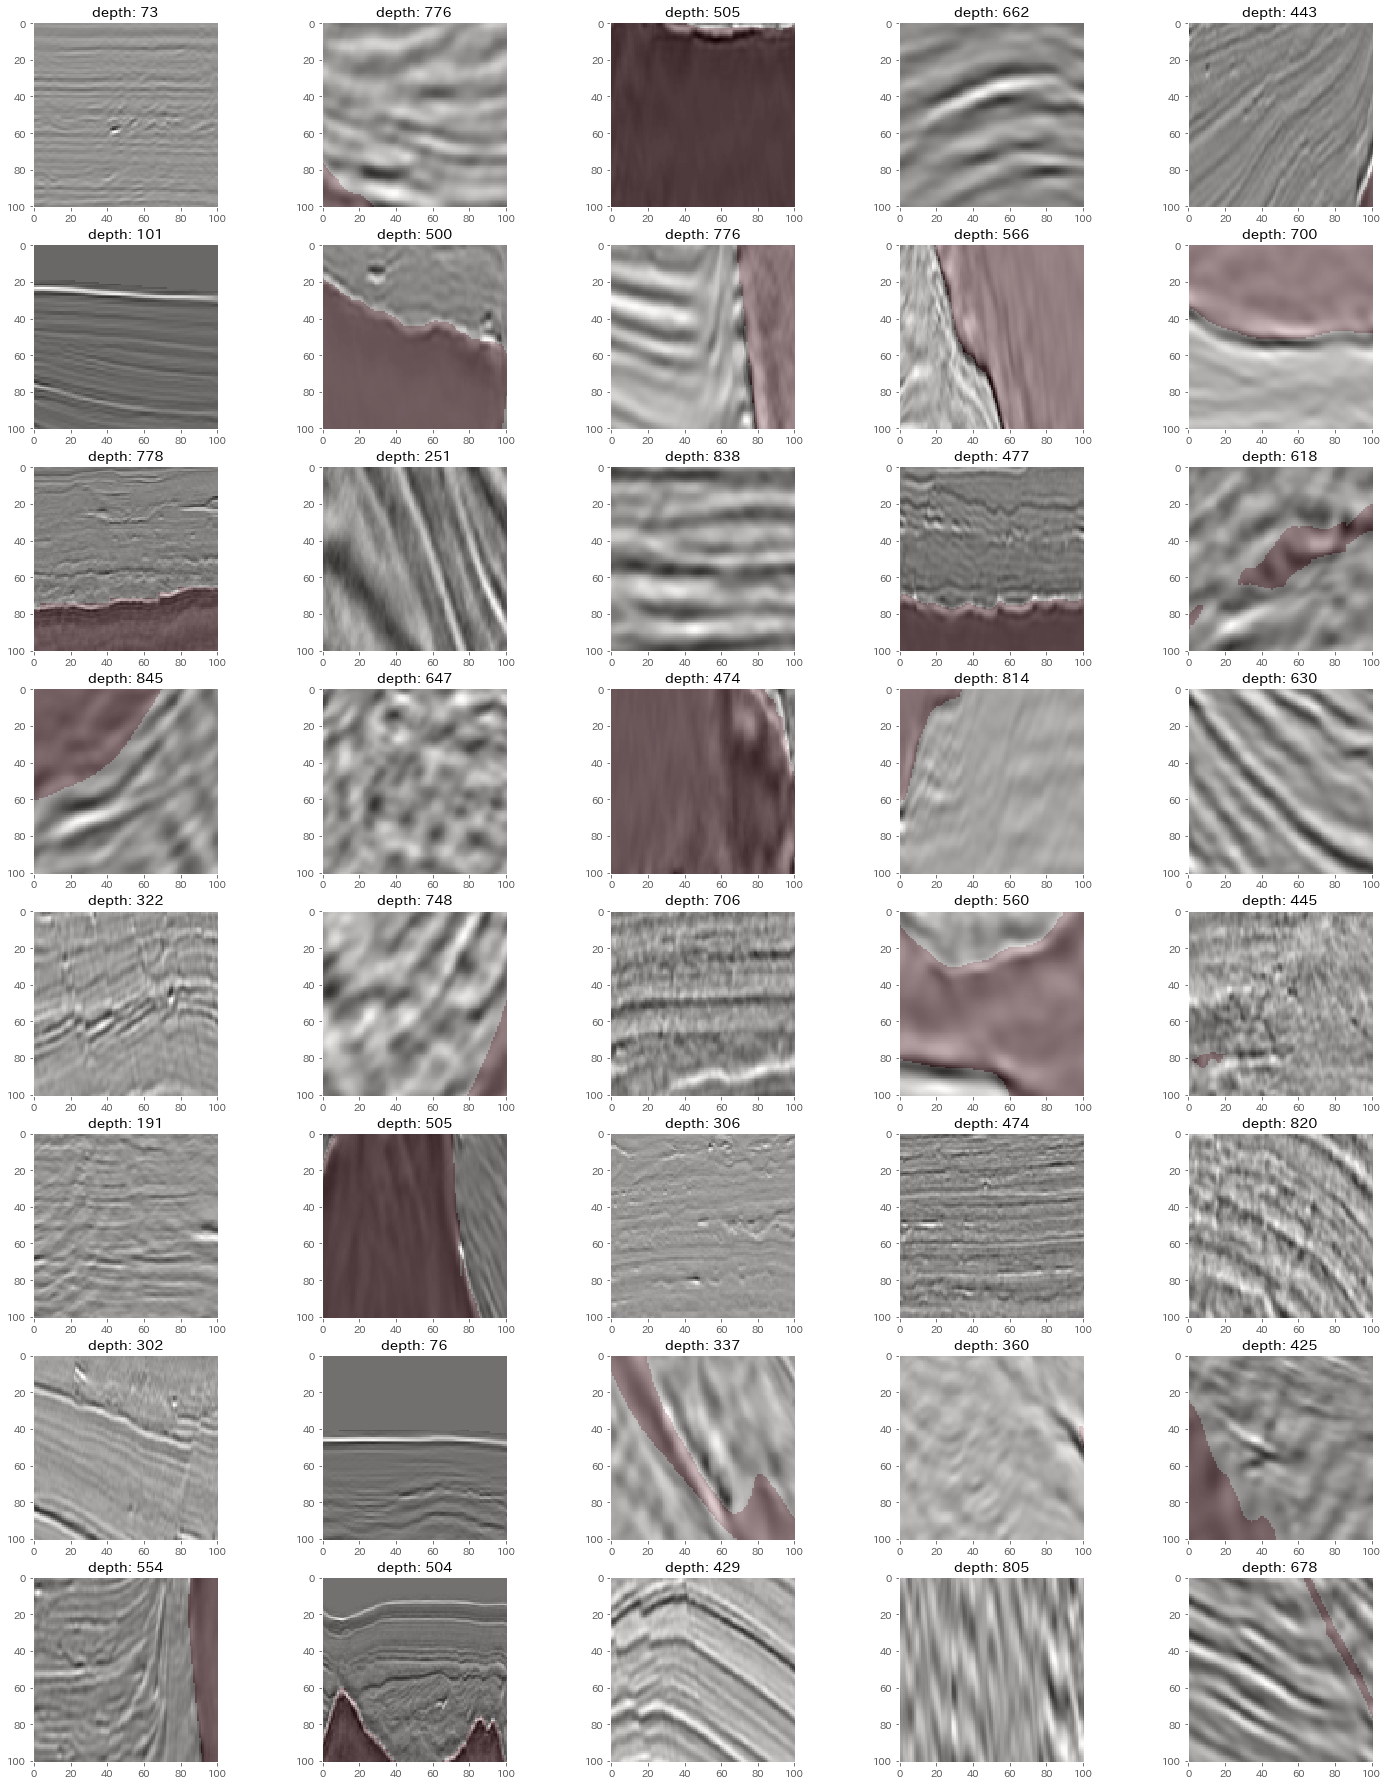

In [62]:
row, col = 8, 5
fig = plt.figure(figsize=(col * 5, row * 4))
files = (data_path / 'train' / 'images' ).glob('*.png')

for i in range(row*col):
    ax = fig.add_subplot(row, col, i + 1)

    filepath = next(files)
    im = np.asarray(Image.open(filepath))
    depth = depths[depths['id'] == filepath.stem]['z'].values[0]
    
    ax.imshow(im)
    ax.set_title("depth: {}".format(depth))
   
    mask_path= (data_path / 'train' / 'masks' ) / filepath.name
    mask = np.asarray(Image.open(mask_path))
    ax.imshow(mask, cmap='Reds', alpha=0.2)
    ax.grid(False)